In [548]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

In [549]:
test_data = pd.read_csv("Paitients_Files_Test.csv", delimiter=None)

In [550]:
train_data = pd.read_csv("Paitients_Files_Train.csv", delimiter=None)

In [551]:
print(train_data)

            ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0    ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1    ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2    ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3    ICU200013    1   89  66  23   94  28.1  0.167   21          1  Negative
4    ICU200014    0  137  40  35  168  43.1  2.288   33          1  Positive
..         ...  ...  ...  ..  ..  ...   ...    ...  ...        ...       ...
594  ICU200604    6  123  72  45  230  33.6  0.733   34          0  Negative
595  ICU200605    0  188  82  14  185  32.0  0.682   22          1  Positive
596  ICU200606    0   67  76   0    0  45.3  0.194   46          1  Negative
597  ICU200607    1   89  24  19   25  27.8  0.559   21          0  Negative
598  ICU200608    1  173  74   0    0  36.8  0.088   38          1  Positive

[599 rows x 11 columns]


In [552]:
trainID = train_data.iloc[:,0]
trainSepsis = train_data.iloc[:,-1]
train_data = train_data.iloc[:, 1:-2]
testID = test_data.iloc[:,0]
test_data = test_data.iloc[:, 1:-1]

In [553]:
print(train_data)

     PRG   PL  PR  SK   TS   M11    BD2  Age
0      6  148  72  35    0  33.6  0.627   50
1      1   85  66  29    0  26.6  0.351   31
2      8  183  64   0    0  23.3  0.672   32
3      1   89  66  23   94  28.1  0.167   21
4      0  137  40  35  168  43.1  2.288   33
..   ...  ...  ..  ..  ...   ...    ...  ...
594    6  123  72  45  230  33.6  0.733   34
595    0  188  82  14  185  32.0  0.682   22
596    0   67  76   0    0  45.3  0.194   46
597    1   89  24  19   25  27.8  0.559   21
598    1  173  74   0    0  36.8  0.088   38

[599 rows x 8 columns]


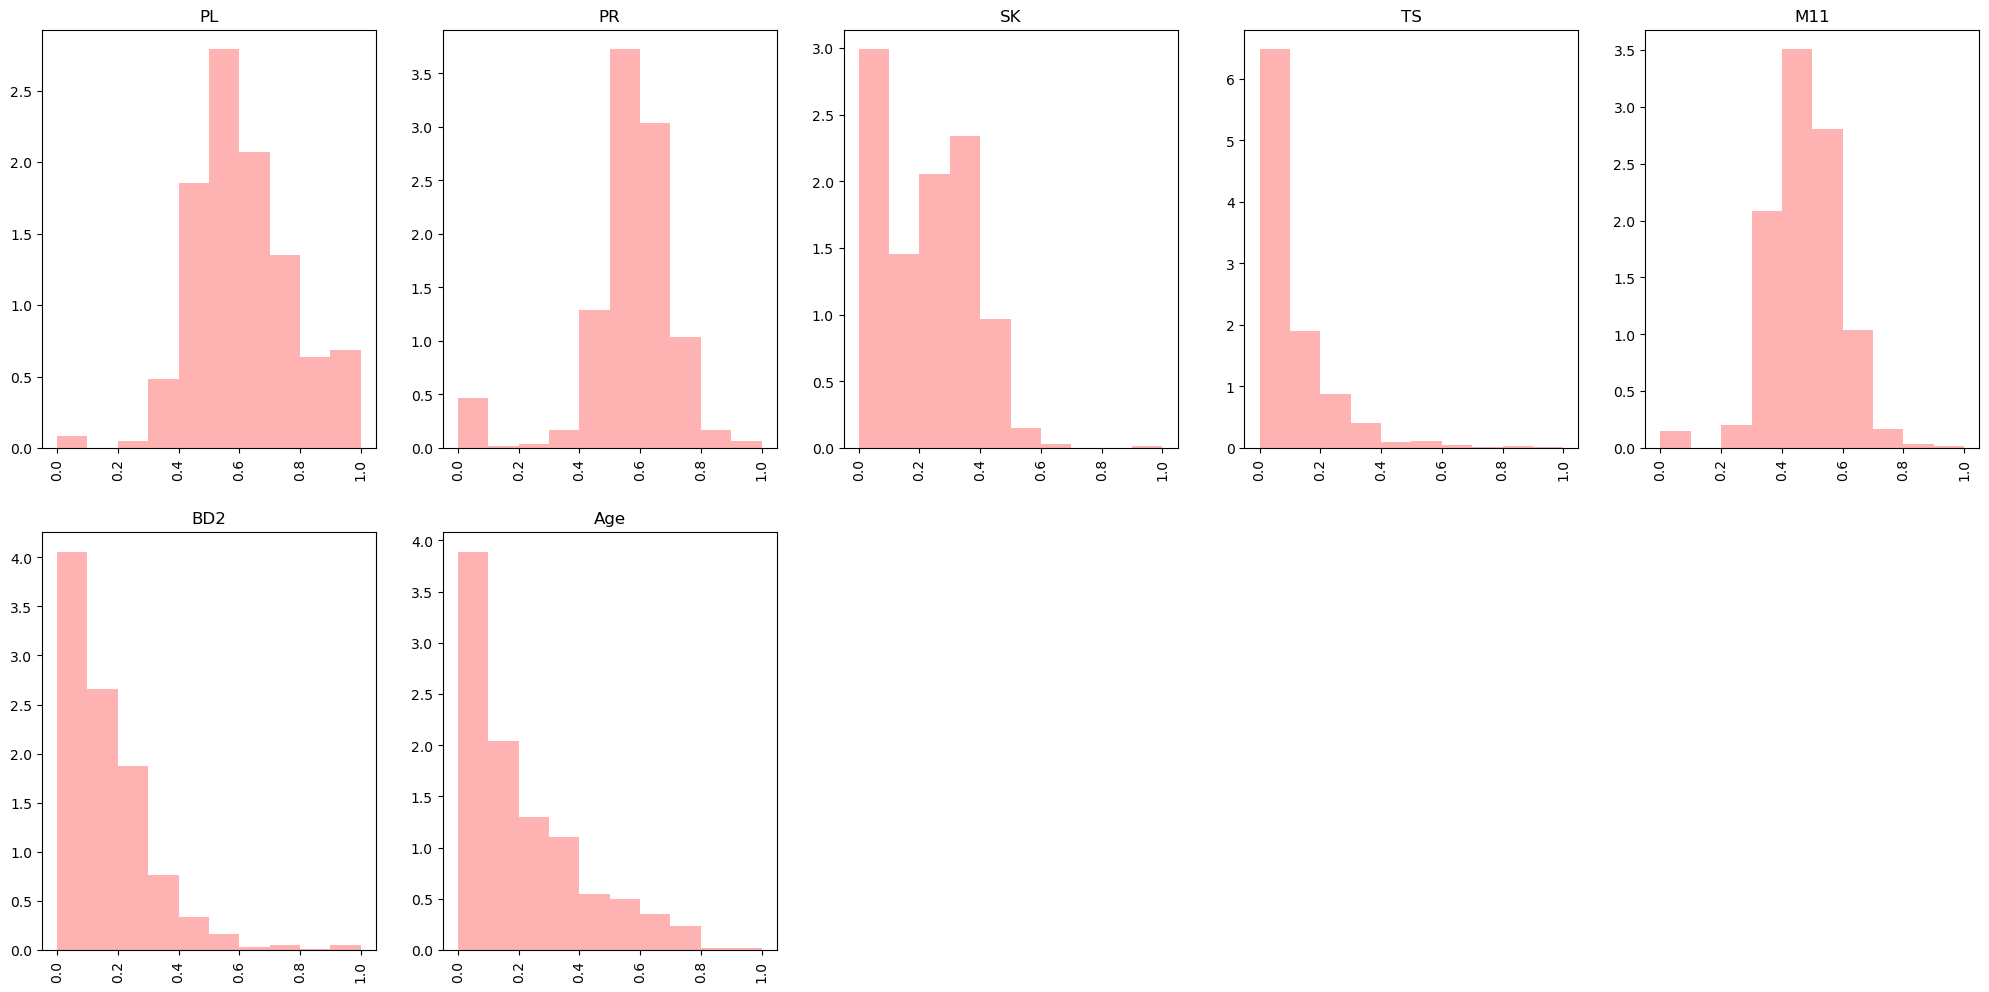

In [554]:
plt.figure(figsize=(25,25))
for i, col in enumerate(train_data.columns[1:]):
    plt.subplot(4,5,i+1)
    plt.hist(train_data_normalize[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [555]:
scaler = MinMaxScaler()
train_data_normalize = scaler.fit_transform(train_data)
test_data_normalize = scaler.fit_transform(test_data)

In [556]:
train_data_normalize = pd.DataFrame(train_data_normalize, columns=train_data.columns)
test_data_normalize = pd.DataFrame(test_data_normalize, columns=test_data.columns)

In [557]:
train_data_normalize = pd.concat([train_data_normalize, trainSepsis], axis=1)

In [558]:
le = LabelEncoder()
train_data_normalize['Sepssis'] = le.fit_transform(train_data_normalize['Sepssis'])

In [559]:
print(train_data_normalize)

          PRG        PL        PR        SK        TS       M11       BD2  \
0    0.352941  0.747475  0.590164  0.353535  0.000000  0.500745  0.234415   
1    0.058824  0.429293  0.540984  0.292929  0.000000  0.396423  0.116567   
2    0.470588  0.924242  0.524590  0.000000  0.000000  0.347243  0.253629   
3    0.058824  0.449495  0.540984  0.232323  0.111111  0.418778  0.038002   
4    0.000000  0.691919  0.327869  0.353535  0.198582  0.642325  0.943638   
..        ...       ...       ...       ...       ...       ...       ...   
594  0.352941  0.621212  0.590164  0.454545  0.271868  0.500745  0.279675   
595  0.000000  0.949495  0.672131  0.141414  0.218676  0.476900  0.257899   
596  0.000000  0.338384  0.622951  0.000000  0.000000  0.675112  0.049530   
597  0.058824  0.449495  0.196721  0.191919  0.029551  0.414307  0.205380   
598  0.058824  0.873737  0.606557  0.000000  0.000000  0.548435  0.004270   

          Age  Sepssis  
0    0.483333        1  
1    0.166667        0  


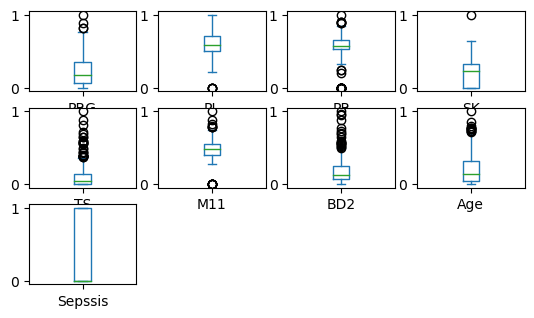

In [560]:
train_data_normalize.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

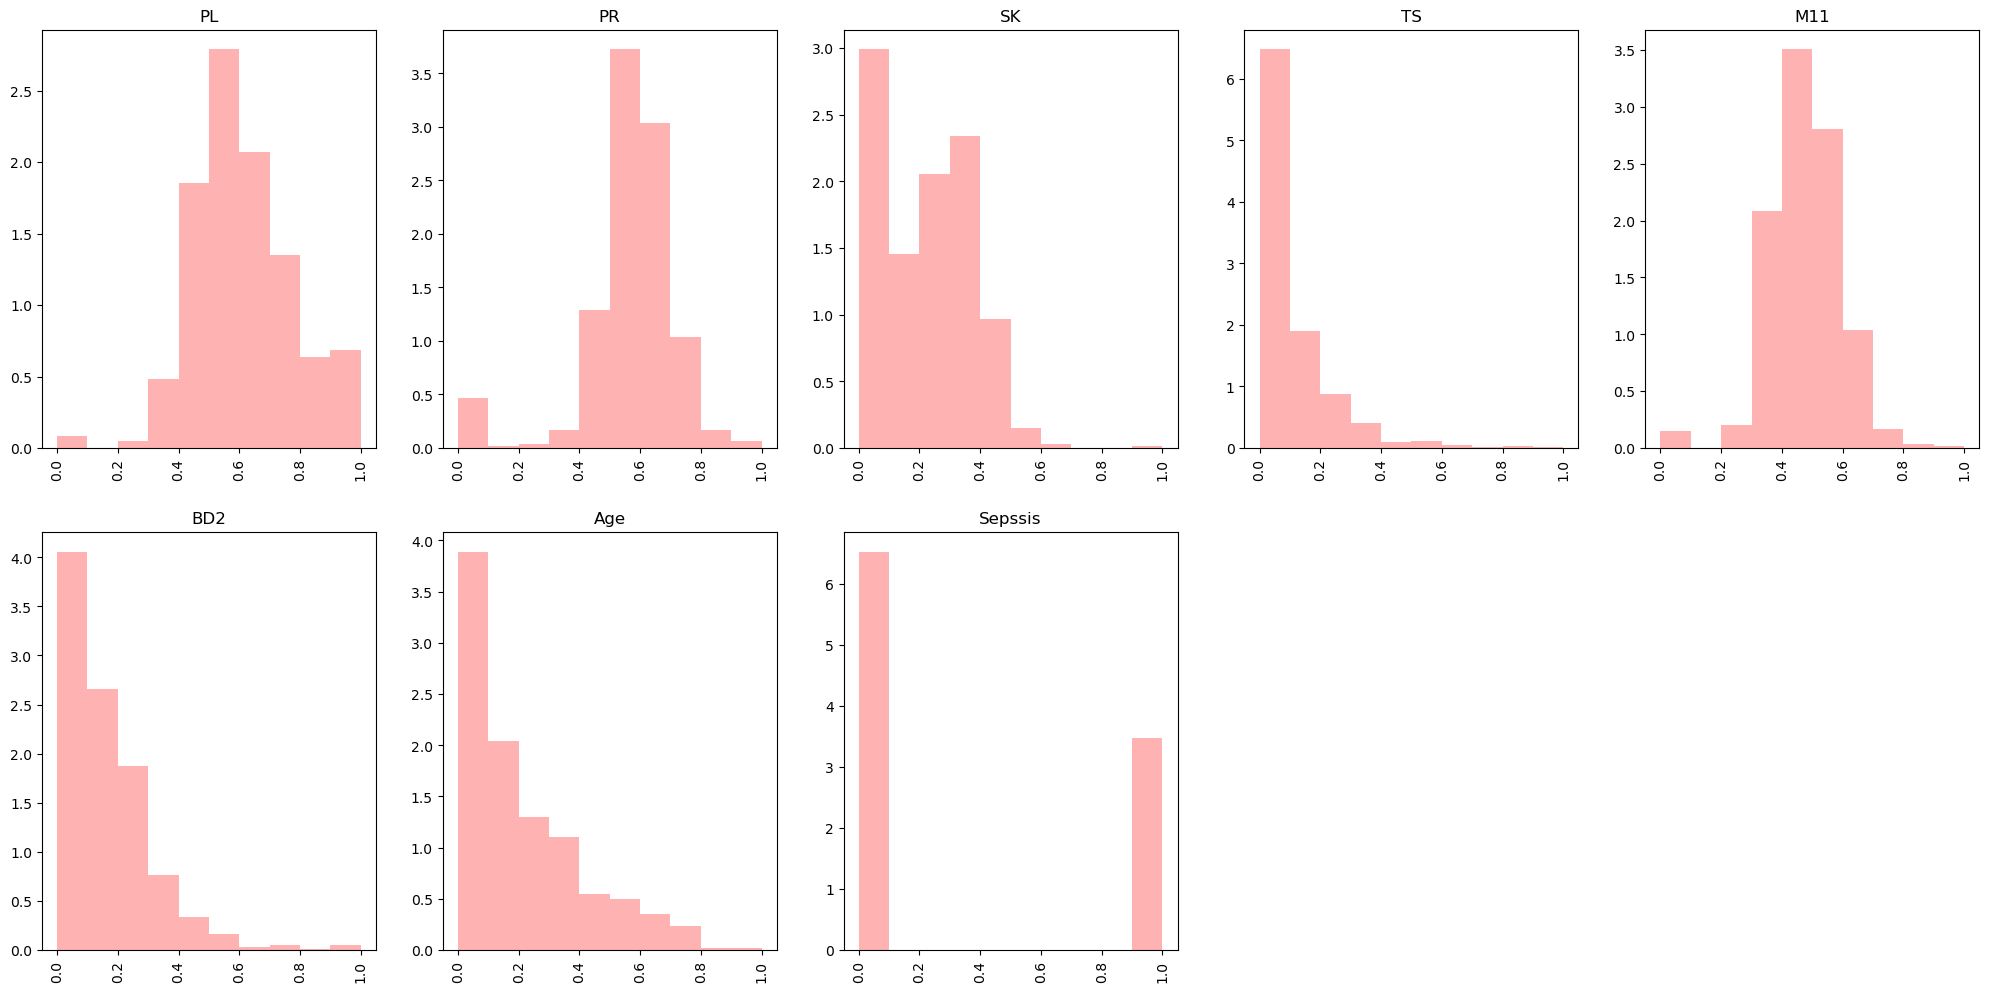

In [561]:
plt.figure(figsize=(25,25))
for i, col in enumerate(train_data_normalize.columns[1:]):
    plt.subplot(4,5,i+1)
    plt.hist(train_data_normalize[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

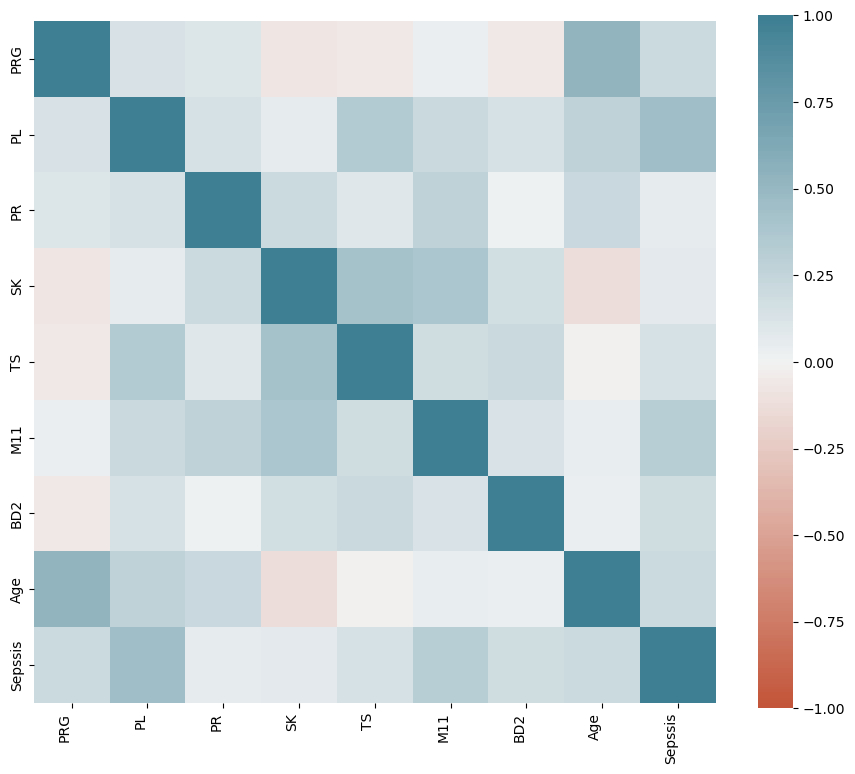

In [562]:
f, ax = plt.subplots(figsize=(11, 9))
corr = train_data_normalize.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

## Splitting Data

In [563]:
patient_X = train_data_normalize.drop('Sepssis', axis=1)
patient_Y = train_data_normalize[['Sepssis']]
train_X, val_X, train_Y, val_Y = train_test_split(patient_X, patient_Y, test_size=0.2,shuffle=True)

# Multivariate Linear Regression

In [564]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    pf = PolynomialFeatures(degree)
    patient_x_poly = pf.fit_transform(patient_X)
    scores = cross_val_score(LinearRegression(), patient_x_poly, patient_Y, cv=5, scoring='neg_mean_squared_error')
    print(f"Degree {degree} MSE: {-scores.mean()}")

Degree 1 MSE: 0.16590363567657623
Degree 2 MSE: 0.18283834656711256
Degree 3 MSE: 1.3712000739732162
Degree 4 MSE: 55909.7768576379
Degree 5 MSE: 975.2675116090426
Degree 6 MSE: 1109.6436117196301
Degree 7 MSE: 1339.867427394155
Degree 8 MSE: 1606.762493803313
Degree 9 MSE: 1924.5117742806244


In [565]:
multi_linReg = linear_model.LinearRegression()
history = multi_linReg.fit(train_X, train_Y)

In [566]:
y_pred = multi_linReg.predict(val_X)
threshold = 0.5
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred]
le.fit(['Negative', 'Positive'])
y_pred_string = le.inverse_transform(y_pred_binary)

In [567]:
print('Mean squared error ', mean_squared_error(val_Y, y_pred))

Mean squared error  0.18656725607078392


In [568]:
train_pred = multi_linReg.predict(train_X)
train_pred_binary = [1 if p >= threshold else 0 for p in train_pred]
train_f1 = f1_score(train_Y, train_pred_binary, average='macro')   #calculate the train f1-score
    
val_pred_linear = multi_linReg.predict(val_X)
val_pred_binary = [1 if p >= threshold else 0 for p in val_pred_linear]
val_f1 = f1_score(val_Y, val_pred_binary, average='macro')         #calculate the validation f1-score
    
print("Train F1-Score: {:.3f}".format(train_f1))
print("Validation F1-Score: {:.3f}".format(val_f1))

Train F1-Score: 0.758
Validation F1-Score: 0.722


In [569]:
print(classification_report(val_Y, y_pred_binary,))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        77
           1       0.76      0.51      0.61        43

    accuracy                           0.77       120
   macro avg       0.76      0.71      0.72       120
weighted avg       0.77      0.77      0.75       120



# Logistic Regression

In [570]:
lr = LogisticRegression()
para = {
     'penalty' : ['l1', 'l2', 'elasticnet', None],
     'C' : np.logspace(-10, 2, 20),
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100, 1000, 2000, 4000],
 }
#gSearch = GridSearchCV(lr, para, cv=5)
#gSearch.fit(train_X, train_Y.to_numpy().ravel())
#print("Parameters: ", gSearch.best_params_)
#print("Best score: ", gSearch.best_score_)


In [571]:
#Parameters:  {'C': 1.2742749857031321, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
#Best score:  0.7726535087719298

In [572]:
logReg = LogisticRegression(penalty='l1', C =1.2742749857031321, 
                             random_state=0, solver='liblinear', max_iter=100 , 
                             class_weight='balanced')
logReg.fit(train_X, train_Y.to_numpy().ravel())

LogisticRegression(C=1.2742749857031321, class_weight='balanced', penalty='l1',
                   random_state=0, solver='liblinear')

In [573]:
train_pred = logReg.predict(train_X)
train_f1 = f1_score(train_Y, train_pred, average='macro')   #f1-score of training
    
val_pred = logReg.predict(val_X)
val_f1 = f1_score(val_Y, val_pred, average='macro')         #f1-score of validation
    
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


Train F1-Score score: 0.752
Validation F1-Score score: 0.744


In [574]:
test_log_pred = logReg.predict(val_X)
    
print(classification_report(val_Y, test_log_pred,))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.68      0.65      0.67        43

    accuracy                           0.77       120
   macro avg       0.75      0.74      0.74       120
weighted avg       0.76      0.77      0.77       120



In [575]:
print('Mean squared error ', mean_squared_error(val_Y, test_log_pred))

Mean squared error  0.23333333333333334


In [576]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=10)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l1', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=100, 
                             random_state=0, class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_Y.to_numpy().ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

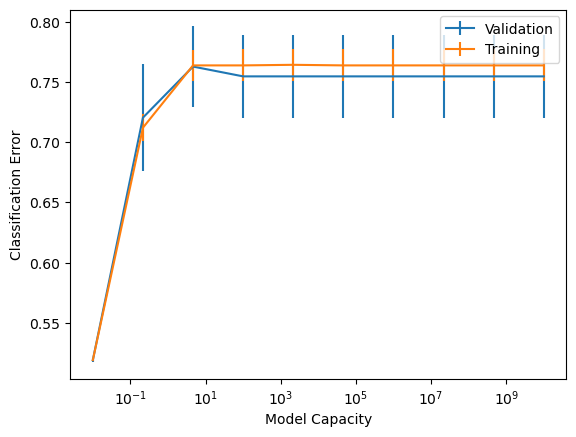

In [577]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

# Decision Tree

In [578]:
param_grid = {
    'max_depth': [3, 6, 9, 20, 30],
    'min_samples_split': [3, 6, 9, 20, 30],
    'min_samples_leaf': [1, 3, 5, 7 ,9],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [579]:
decTree = DecisionTreeClassifier()
grid_search = GridSearchCV(decTree, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_Y)
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 9}


In [580]:
decTreeReg = DecisionTreeClassifier(max_depth= 20,max_features= 'log2', min_samples_leaf= 7, min_samples_split= 30,
                                    random_state=89)
decTreeReg.fit(train_X, train_Y.to_numpy().ravel())

DecisionTreeClassifier(max_depth=20, max_features='log2', min_samples_leaf=7,
                       min_samples_split=30, random_state=89)

In [581]:
trainDecTree = decTreeReg.predict(train_X)
train_f1 = f1_score(train_Y, trainDecTree, average='macro') # f1-score of training

valDecTree = decTreeReg.predict(val_X)
val_f1 = f1_score(val_Y, valDecTree, average='macro') #f1-score of validation

print("Train F1-Score: {:.3f}".format(train_f1))
print("Validation F1-Score: {:.3f}".format(val_f1))

print("Classification report:")
print(classification_report(val_Y, valDecTree))

Train F1-Score: 0.766
Validation F1-Score: 0.597
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        77
           1       0.79      0.26      0.39        43

    accuracy                           0.71       120
   macro avg       0.74      0.61      0.60       120
weighted avg       0.73      0.71      0.66       120



# My Judgement


In [582]:
def scoreF1(val, predictedVal, n):
    score = [];
    for i in range (n):
        score.append(f1_score(val, predictedVal, average='macro'))
    return np.mean(score)

In [583]:

f1_linear = scoreF1(val_Y, val_pred_binary, 5)
f1_logistic = scoreF1(val_Y, val_pred, 5)
f1_decision = scoreF1(val_Y, valDecTree, 5)

print("Linear Regression f1 score:", f1_linear)
print("Logistic Regression f1 score:", f1_logistic)
print("Decision Tree f1 score:", f1_decision)

Linear Regression f1 score: 0.7222222222222222
Logistic Regression f1 score: 0.7435897435897436
Decision Tree f1 score: 0.5973540408398044


# Predict Test File

In [584]:
test_data_normalize

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,0.076923,0.370629,0.333333,0.367347,0.222222,0.403141,0.192115,0.102041
1,0.076923,0.363636,0.771930,0.387755,0.000000,0.472949,0.187735,0.061224
2,0.461538,0.279720,0.000000,0.000000,0.000000,0.413613,0.056320,0.142857
3,0.076923,0.475524,0.649123,0.734694,0.000000,0.485166,0.000000,0.183673
4,0.538462,0.657343,0.684211,0.591837,0.233333,0.614311,0.370463,0.673469
...,...,...,...,...,...,...,...,...
164,0.769231,0.314685,0.666667,0.979592,0.333333,0.574171,0.044431,0.857143
165,0.153846,0.461538,0.614035,0.551020,0.000000,0.642234,0.150188,0.122449
166,0.384615,0.454545,0.631579,0.469388,0.207407,0.457243,0.090738,0.183673
167,0.076923,0.489510,0.526316,0.000000,0.000000,0.525305,0.155820,0.530612


In [585]:
test_pred = logReg.predict(test_data_normalize)

In [586]:
test_pred_df = pd.DataFrame(test_pred, columns=['Sepssis'])
test_pred_df.index = test_data_normalize.index
test_pred_df = pd.concat([test_pred_df, testID], axis=1)

In [587]:
test_pred_df[["Sepssis"]] = test_pred_df[["Sepssis"]].replace(0, "Negative").replace(1, "Positive")
test_pred_df = test_pred_df[['ID','Sepssis']]
test_pred_df.to_csv('COSC2753_A1_Predictions_s3881388.csv', index=False)